# Esercizio di gruppo

In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
# Caricare i dati specificando che gli spazi sono il separatore
df = pd.read_csv(
    "https://raw.githubusercontent.com/zedr/ai-bootcamp-2025/refs/heads/main/python/inputs/input.txt",
    header=None,    # Nessuna intestazione nel file
    names=["valori_a", "valori_b"],  # Nome della colonna
    sep=r"\s+"  # Riconosce spazi multipli come separatore
)

In [21]:
df.head()

,valori_a,valori_b
0,27484,55634
1,67560,75018
2,43926,95501
3,86974,55714
4,71747,78366


In [105]:
df.head()

,valori_a,valori_b,valori_assoluti
0,27484,55634,28150
1,67560,75018,7458
2,43926,95501,51575
3,86974,55714,31260
4,71747,78366,6619


In [30]:
# Calcolare il valore assoluto
df["valori_assoluti"] = abs(df["valori_a"] - df["valori_b"])
df.head()

,valori_a,valori_b,valori_assoluti
0,27484,55634,28150
1,67560,75018,7458
2,43926,95501,51575
3,86974,55714,31260
4,71747,78366,6619


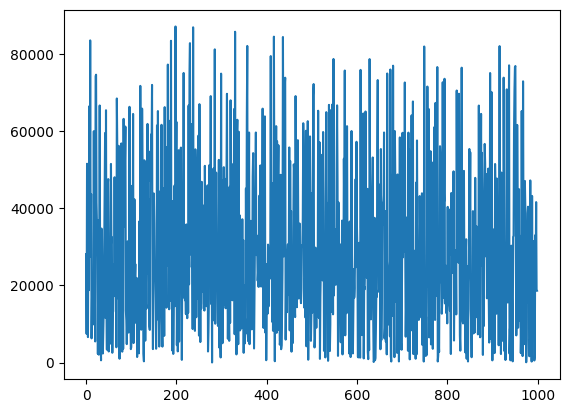

In [32]:
plt.plot(df["valori_assoluti"])

In [63]:
col1_counts = pd.concat([df['valori_a'], df['valori_b']]).value_counts()

In [65]:
col1_counts

52600    21
52220    20
70973    20
42384    19
34601    19
         ..
97815     1
37176     1
52323     1
35773     1
30416     1
Name: count, Length: 1584, dtype: int64

In [103]:
df2 = pd.DataFrame(col1_counts)
df2 = df2.reset_index()
df2.head()

,index,count
0,52600,21
1,52220,20
2,70973,20
3,42384,19
4,34601,19


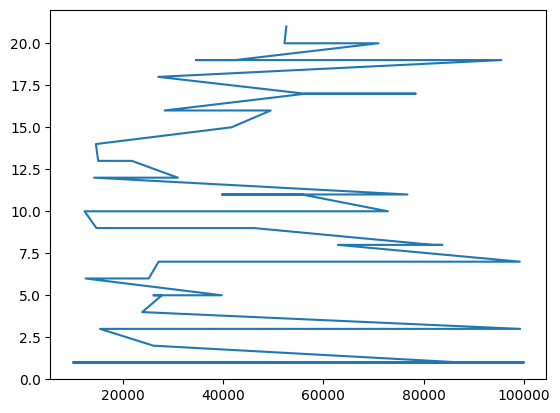

In [114]:
plt.plot(df2["index"], df2["count"])

# Titanic Project
## Caricare dataset via web

In [119]:
url= "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df3 = pd.read_csv(url)

In [120]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
# Mostra la tabella con true e false per vedere quali dati sono vuoti (TRUE = Vuoto)
df3.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
# conta il numero di righe in cui appare il valore
df3.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [139]:
# sum aggiunge 1 ogni volta che è True quindi 1
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
# Vedere se ci sono dati vuoti
df3.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
# Valori possibili per Embarked
df3.value_counts(df3["Embarked"])

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [133]:
# Valori possibili e conteggio per Survived

df3.value_counts(df3["Survived"])

Survived
0    549
1    342
Name: count, dtype: int64

In [130]:
# Rappresentazione del df
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
# Ci da una panoramica di dati statici
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
# Dove non abbiamo età possiamo inserire un valore standard, come la media
df3['Age'] = df3['Age'].fillna(df3['Age'].median())

In [147]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
df3["Age"].isnull().sum()

np.int64(0)

In [151]:
# Eliminare la colonna Cabina e creo un altro dataframe

df3_dropped = df3.drop("Cabin", axis=1)

In [154]:
df3_dropped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Text(0.5, 1.0, 'Survival Count')

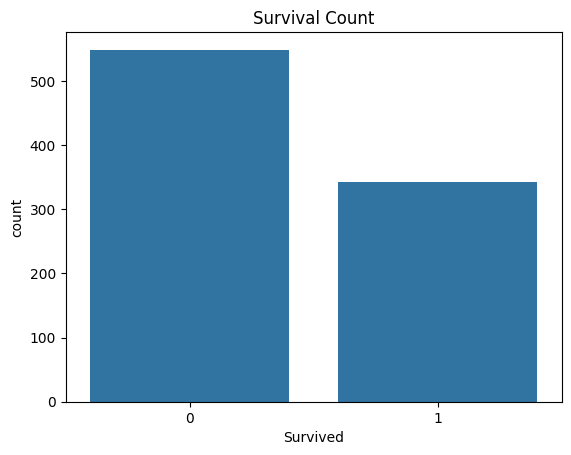

In [157]:
## Useremo Seaborn

sns.countplot(x="Survived", data=df3)
plt.title("Survival Count")

Text(0.5, 1.0, 'Survival Rate by Gender Sex')

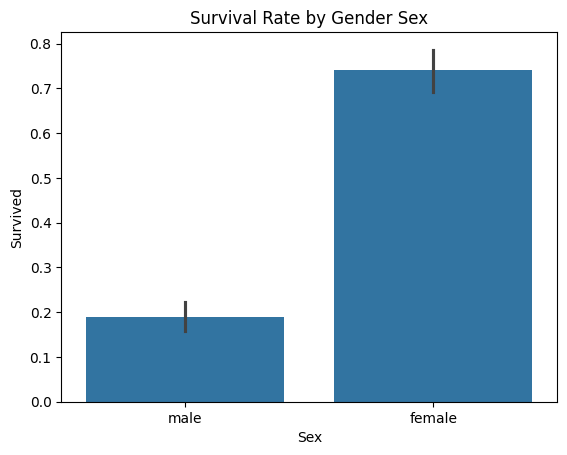

In [158]:
sns.barplot(
    x="Sex",
    y="Survived",
    data=df3
    )
plt.title("Survival Rate by Gender Sex")

Text(0.5, 1.0, 'Age distribution of passengers')

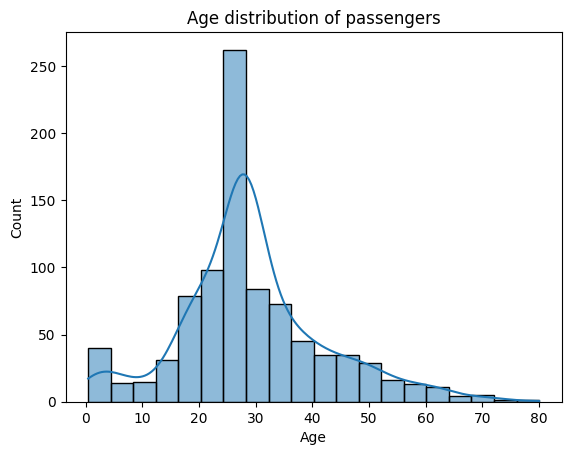

In [161]:
sns.histplot(
    df3["Age"],
    bins=20,
    kde=True
)
plt.title("Age distribution of passengers")

In [164]:
df3.value_counts(df3["Age"] == 0)

Age
False    891
Name: count, dtype: int64

Text(0.5, 1.0, 'Age distribution of passengers')

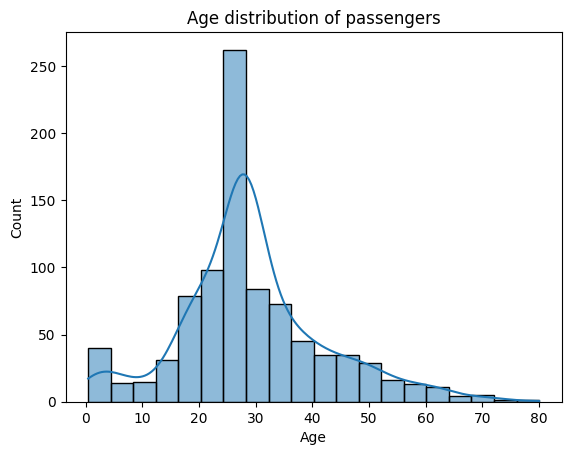

In [160]:
sns.histplot(
    df3_dropped["Age"],
    bins=20,
    kde=True
)
plt.title("Age distribution of passengers")

Text(0.5, 1.0, 'Age distribution of passengers')

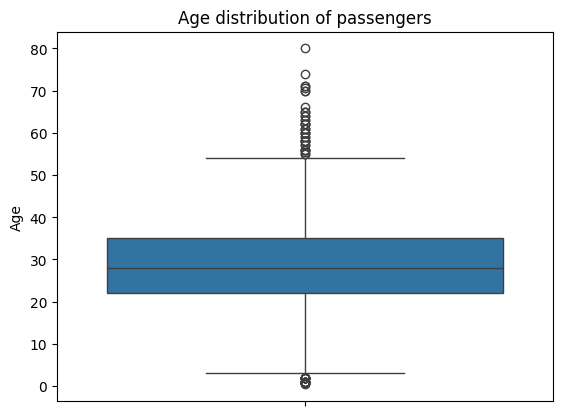

In [166]:
sns.boxplot(
    df3_dropped["Age"]
)
plt.title("Age distribution of passengers")